# Showering in new muon sample (10k muons)
In this notebook, we aim to study the showering of high-charge particles (i.e. neutrons) cause by the rock that surrounds the main volume.

In particular, we would highlight the showering effect. Please note:
1. The **higher number of neutrons** (count tracknumber, not entries) in the new geometry.
1. The *higher kinetic energy of neutrons in the new geometry.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load old and new dataset
filepath = os.path.join("..", "Data", "output10000.csv")
filepath_old = os.path.join("..", "Data", "output123456789.csv")
df = pd.read_csv(filepath, index_col=False).sort_values("time")
df_old = pd.read_csv(filepath_old, index_col=False).sort_values("time")
# For each neutron (i.e. tracknumber), consider the first entry w.r.t. time
neutrons_new = df[df.PID==2112].groupby(["eventnumber", "tracknumber"]).first().reset_index()
neutrons_old = df_old[df_old.PID==2112].groupby(["eventnumber", "tracknumber"]).first().reset_index()

print("[Old data] Neutron tracks: {}".format(len(neutrons_old)))
print("[New data] Neutron tracks: {}".format(len(neutrons_new)))

[Old data] Neutron tracks: 42
[New data] Neutron tracks: 552


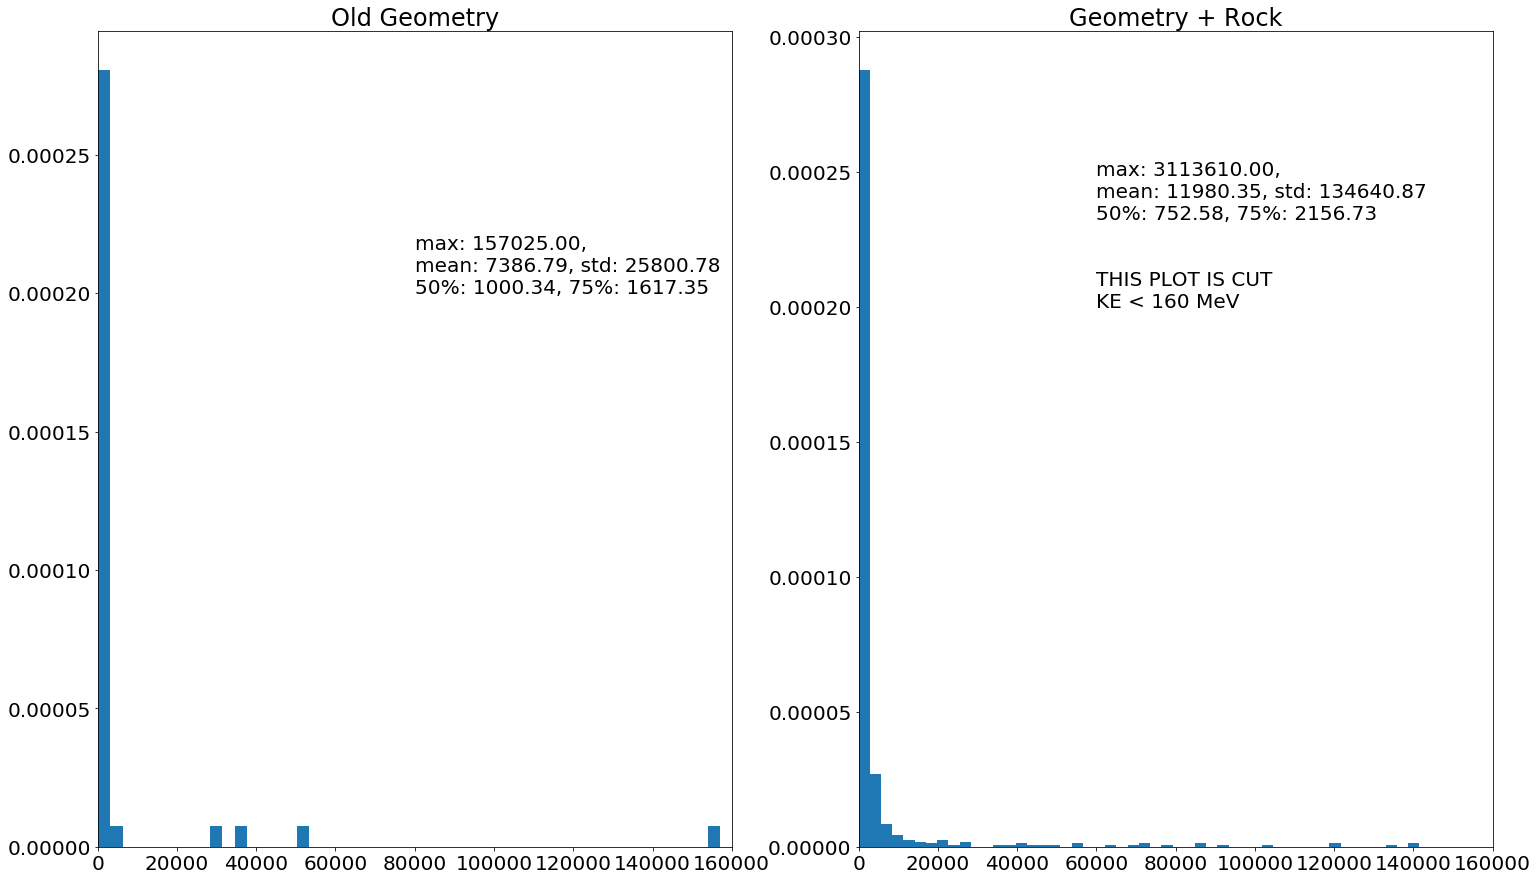

STATISTICS OF KE - Old Geometry vs New Geometry


,count,mean,std,min,25%,50%,75%,max
old_geom,42.0,7386.787056,25800.778980,0.0,175.36375,1000.3380,1617.350,157025.0
geom+rock,552.0,11980.353871,134640.874648,0.0,158.52225,752.5795,2156.725,3113610.0


In [135]:
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

old_stat = neutrons_old.kineticenergy.describe()
new_stat = neutrons_new.kineticenergy.describe()
stat=pd.DataFrame([old_stat, new_stat], index=["old_geom", "geom+rock"])

old_high_neutrons = neutrons_old
new_high_neutrons = neutrons_new[neutrons_new.kineticenergy < 160000]

plt.subplot(1, 2, 1)
plt.hist(old_high_neutrons.kineticenergy, 50, density=True)
ma, mean, std, p50, p75 = stat.loc['old_geom', ['max', 'mean', 'std', '50%', '75%']]
label = "max: {:.2f},\n" \
        "mean: {:.2f}, std: {:.2f}\n"  \
        "50%: {:.2f}, 75%: {:.2f}".format(ma, mean, std, p50, p75)
plt.text(80000, 0.0002, label)
plt.title("Old Geometry")
plt.xlim(0, 160000)

plt.subplot(1, 2, 2)
plt.hist(new_high_neutrons.kineticenergy, 50, density=True)
ma, mean, std, p50, p75 = stat.loc['geom+rock', ['max', 'mean', 'std', '50%', '75%']]
label = "max: {:.2f},\n" \
        "mean: {:.2f}, std: {:.2f}\n"  \
        "50%: {:.2f}, 75%: {:.2f}" \
        "\n\n\n" \
        "THIS PLOT IS CUT\n" \
        "KE < 160 MeV".format(ma, mean, std, p50, p75)
plt.text(60000, 0.0002, label)
plt.title("Geometry + Rock")
plt.xlim(0, 160000)
plt.show()

print("STATISTICS OF KE - Old Geometry vs New Geometry")
stat

## Observations:
1. The new dataset contains entries related to 884 events. CJ said to have simulated 10k muons, then I expect that most of them doesn't enter in the LAr volume, maybe cross the water volume. **Does it depend on the MUSUN angles?** In this setting <10% of simulation effort lead to depositions in the LAr.
1. In the old dataset, there were `42` neutron tracks, whilst in the new dataset, there are `552`. If the number of neutron tracks has scaled linearly, we expect a number of tracks ~ `42*9=378`. Instead, the number of neutron tracks is `552 >> 378`. **This increase of neutrons confirms the showering effect caused by rocks.**
1. The introduction of showering changes the KE distribution. We notice a lot of **high-energy neutrons** as shown in the plot and the table above.